In [1]:
#all work below is Josh Mestemacher's
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('tax_data.csv')
df.head(10)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,785000.0,519980.0,85690.0,165290.0,724170.0,22560.0,...,0.0,0.0,57720.0,46577.0,674840.0,1827202.0,672200.0,1818867.0,2900.0,6089.0
1,1,AL,0,2,554310.0,270870.0,121420.0,146470.0,515150.0,13260.0,...,0.0,0.0,81770.0,112540.0,470410.0,1445383.0,466960.0,1432458.0,4660.0,11648.0
2,1,AL,0,3,290630.0,113280.0,124770.0,44570.0,269700.0,6420.0,...,0.0,0.0,70360.0,144380.0,220710.0,626662.0,216530.0,610170.0,5760.0,16235.0
3,1,AL,0,4,181010.0,42010.0,120820.0,14410.0,168830.0,2570.0,...,0.0,0.0,49500.0,135429.0,130670.0,437179.0,126790.0,419324.0,3730.0,14903.0
4,1,AL,0,5,269080.0,31310.0,224330.0,8270.0,252360.0,3250.0,...,100.0,20.0,103250.0,470206.0,165650.0,724529.0,156910.0,642895.0,11280.0,80064.0
5,1,AL,0,6,81340.0,5000.0,72270.0,630.0,76810.0,230.0,...,41750.0,164094.0,43960.0,1216690.0,34560.0,735671.0,24770.0,285560.0,9630.0,391783.0
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0


I will filter out 0 zipcode records and redo my stuff from week 6 with that modification

In [2]:
df = df[df.zipcode!=0]

## Re-Reinspection of % of Wages and Salary That Is Taxed

In [3]:
df['%SalaryTaxed'] = df['A18300'] / df['A00200']
df['%SalaryTaxed'].mean()

inf

In [4]:
salaryFilters = df[df['A00200'] != 0]
salaryFilters.head(5)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,%SalaryTaxed
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0,0.002969
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0,0.001851
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0,0.005370
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0,0.006408
10,1,AL,35004,5,810.0,80.0,710.0,20.0,760.0,20.0,...,0.0,290.0,1124.0,530.0,1967.0,510.0,1925.0,20.0,139.0,0.009181


We still get weird values for % of salary and wages that is taxed (no visible improvement here)

In [5]:
df['%SalaryTaxed'] = salaryFilters['A18300'] / salaryFilters['A00200']
df['%SalaryTaxed'].mean()

0.00957510538310133

At least our average % of salary and wages that is taxed is not infinity, so that is an improvement marginally

In [6]:
salaryFilters[['A18300', 'A00200', '%SalaryTaxed']].sort_values('%SalaryTaxed', ascending=False)

,A18300,A00200,%SalaryTaxed
96934,474.0,167.0,2.838323
96935,762.0,689.0,1.105951
96936,947.0,1445.0,0.655363
94013,179.0,396.0,0.452020
12353,157.0,351.0,0.447293
...,...,...,...
113985,0.0,4861.0,0.000000
113986,0.0,18224.0,0.000000
113987,0.0,42913.0,0.000000
56982,0.0,10315.0,0.000000


After looking at the above, I still don't think we will get anything from exploring
Total taxes paid / wages and salary.
Let's again go check out total tax liability amounts for different economic classes

## Total Tax Liability Re-exploration

In [7]:
df.groupby('agi_stub')['A10300'].median() #median to deal with skewed data

agi_stub
1     204.0
2     889.0
3    1266.0
4    1329.0
5    3599.0
6    3414.0
Name: A10300, dtype: float64

Conclusions here seem to not change from before

A10300    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

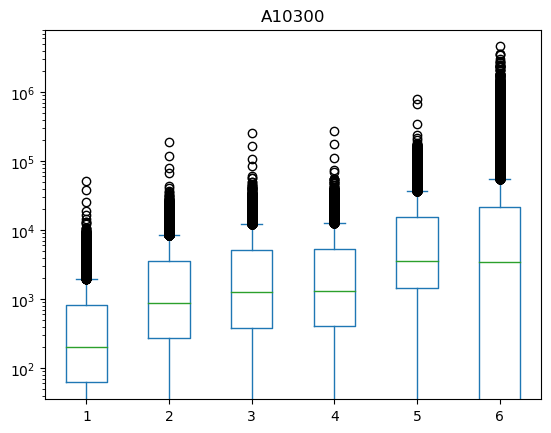

In [8]:
df.plot.box(column='A10300', by='agi_stub', logy=True) #log scaling to actually make
#graph readable

Conclusions here again seem to not change from before

In [9]:
total_income_amount = df.A02650.sum()
total_tax_liability_amount = df.A10300.sum()
print('total income', total_income_amount)
print('total tax liability', total_tax_liability_amount)
(total_tax_liability_amount / total_income_amount)*100

total income 12811088898.060104
total tax liability 1783106391.0


13.918460836455546

Number here didn't change for some reason, perhaps because the 0 zipcodes just contained duplicate data that doesn't affect the number here if removed? Regardless our conclusions here don't change from before

In [12]:
#NOTE: comments below are unchanged from before

#I want to make a cross tab of the averages of different metrics for taxes paid
#for different economic classes for reference use
#we will use the metrics (copied and pasted from Michael's work):
# A00100 - adjust gross income
# A18300 - total taxes paid amount
# A11901 - tax due at time of filing amount
# A11900 - total overpayments amount
# A10300 - total tax liability (my own thing here)
#and also add the total income metric for comparison purposes
#A02650 - total income amount

taxMetricsTable = df.pivot_table(values=['A00100', 'A18300', 'A11901', 'A11900', 'A02650', 'A10300'], index=['agi_stub'], aggfunc=['mean'])
taxMetricsTable = taxMetricsTable.rename(columns={'A00100': "Adjusted_Gross_Income", 'A18300': "Total_Taxes_Paid_Amount", 'A11901':"Tax_Due_At_Filing_Time", 'A11900':"Total_Overpayments", 'A02650':"Total_Income_Amount", 'A10300': 'Total_Tax_Liability'})
#lets rename the agi stub levels to be more descriptive
taxMetricsTable = taxMetricsTable.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
taxMetricsTable.index.names = ['Adjusted Gross Income Level']
#note that using median here gets me weird results so hence I use mean
taxMetricsTable

mean                      \
                            Adjusted_Gross_Income Total_Income_Amount   
Adjusted Gross Income Level                                             
<25k                                 22446.776406        22901.335036   
[25k, 50k)                           51175.184234        51753.788652   
[50k, 75k)                           50100.815982        50641.619692   
[75k, 100k)                          44658.508506        45090.204473   
[100k, 200k)                        110693.815726       111853.684731   
>200k                               178462.019969       180404.460450   

                                                                    \
                            Total_Tax_Liability Total_Overpayments   
Adjusted Gross Income Level                                          
<25k                                 655.885711        3438.865742   
[25k, 50k)                          2603.035569        3390.546745   
[50k, 75k)                          3719.622576        1793.161918   
[75k, 100k)                         3968.500777        1259.373822   
[100k, 200k)                       12978.862174        2275.448875   
>200k                              40466.108331        3826.413606   

                                                                            
                            Tax_Due_At_Filing_Time Total_Taxes_Paid_Amount  
Adjusted Gross Income Level                                                 
<25k                                    142.147980              107.818763  
[25k, 50k)                              297.092478              275.562453  
[50k, 75k)                              374.810927              493.590619  
[75k, 100k)                             365.625781              557.105537  
[100k, 200k)                           1315.537834             1554.225521  
>200k                                  5035.713032             1503.415340

Raw numbers here definitely changed from before, seem to be smaller now

In [13]:
#NOTE again: comments below are unchanged from before


#lets do the table again but this time with the tax metrics divided by the total income
#for each respective agi stub level.
taxMetricsTable.div(taxMetricsTable['mean']['Total_Income_Amount'], axis=0)

mean                      \
                            Adjusted_Gross_Income Total_Income_Amount   
Adjusted Gross Income Level                                             
<25k                                     0.980151                 1.0   
[25k, 50k)                               0.988820                 1.0   
[50k, 75k)                               0.989321                 1.0   
[75k, 100k)                              0.990426                 1.0   
[100k, 200k)                             0.989630                 1.0   
>200k                                    0.989233                 1.0   

                                                                    \
                            Total_Tax_Liability Total_Overpayments   
Adjusted Gross Income Level                                          
<25k                                   0.028640           0.150160   
[25k, 50k)                             0.050297           0.065513   
[50k, 75k)                             0.073450           0.035409   
[75k, 100k)                            0.088012           0.027930   
[100k, 200k)                           0.116034           0.020343   
>200k                                  0.224308           0.021210   

                                                                            
                            Tax_Due_At_Filing_Time Total_Taxes_Paid_Amount  
Adjusted Gross Income Level                                                 
<25k                                      0.006207                0.004708  
[25k, 50k)                                0.005740                0.005324  
[50k, 75k)                                0.007401                0.009747  
[75k, 100k)                               0.008109                0.012355  
[100k, 200k)                              0.011761                0.013895  
>200k                                     0.027913                0.008334

The numbers here however did not change from before suprisingly, it seems the duplicate data being removed did not affect these numbers. Regardless our conclusions here are the same as before

## Redo of Initial Exploration of Non-Tax Paying Tax Returns

In [14]:
#I am interested in finding out how many non-tax paying tax returns exist
#to see if we can better improve our estimates of the income tax rate by filtering out 
#those returns. Let's explore this now
print(df[df['A18300'] == 0].shape[0], df.shape[0])
print(100*df[df['A18300'] == 0].shape[0] / df.shape[0])

82944 166146
49.92235744465711


Numbers here seem to be changed very little from before, so our conclusions here are the same as before

# Actual New Stuff This Week

I am curious about how real estate taxes differ among different economic classes. I will explore that now

## Initial Exploration of Real Estate Taxes

In [21]:
classes = df.groupby('agi_stub')
estateTaxes = classes['A18500'].sum()
estateTaxes

agi_stub
1     2368437.0
2     5108380.0
3     8520427.0
4     9227502.0
5    27504843.0
6    49055189.0
Name: A18500, dtype: float64

It seems that very rich people pay a lot of taxes for real estate, this is probably because they own very expensive estates

In [23]:
#modifying luke's code here for my own purposes
paidTaxesTotal = classes['A18300'].agg('sum')
paidTaxesTotal

agi_stub
1     2985825.0
2     7631151.0
3    13669005.0
4    15424581.0
5    43031842.0
6    41634081.0
Name: A18300, dtype: float64

In [32]:
#let's get how much % of taxes paid is real estate tax for different economic classes
percentageRealEstateTaxClasses = estateTaxes.div(paidTaxesTotal, axis=0)
percentageRealEstateTaxClasses

agi_stub
1    0.793227
2    0.669411
3    0.623339
4    0.598234
5    0.639174
6    1.178246
dtype: float64

Text(0, 0.5, '% of Taxes Paid That is Real Estate Tax')

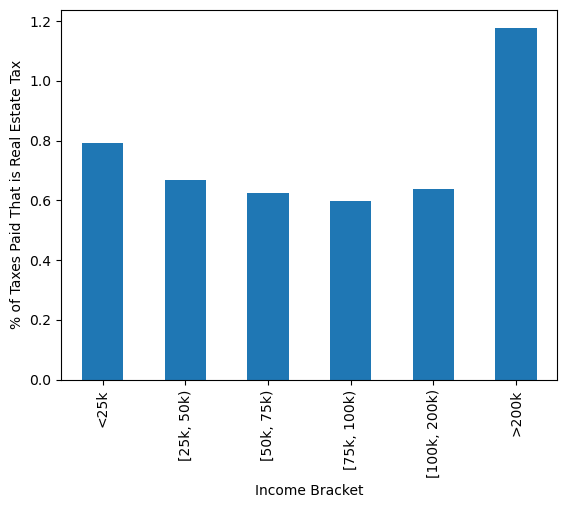

In [38]:
percentageRealEstateTaxClasses = percentageRealEstateTaxClasses.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
percentageRealEstateTaxClasses.plot.bar()
plt.xlabel('Income Bracket')
plt.ylabel('% of Taxes Paid That is Real Estate Tax')

It seems that very wealthy people (people who make over $\$$200k) pay more in real estate taxes then they do in actual total amount of taxes paid. I think this means that very wealthy people likely have high amounts of tax credits relating to real estate. I may explore that more later. Also here I see that very poor people (people who make under $\$$25000) have the second highest % of total taxes paid that is real estate tax. This is surprising to me, as I did not expect very poor people to have a large % of the taxes they pay being real estate taxes. That definitely deserves future exploration. I will note that the raw figures for total real estate taxes do show that very poor people pay the least total real estate taxes and the very rich pay the most, which are not suprising findings to me. Alll of this deserves future investigation.

In [42]:
#let's look at which states have the highest real estate taxes
states = df.groupby('STATE')
stateEstate = states['A18500'].sum()
stateEstate

STATE
AK      124148.0
AL      325232.0
AR      193947.0
AZ     1116941.0
CA    23271014.0
CO     1406334.0
CT     2099251.0
DC      366989.0
DE      180646.0
FL     5959274.0
GA     2316539.0
HI      244697.0
IA      446887.0
ID      269740.0
IL     4886327.0
IN      578581.0
KS      454591.0
KY      385774.0
LA      313884.0
MA     3547217.0
MD     3122622.0
ME      237336.0
MI     1721317.0
MN     1418326.0
MO      800842.0
MS      188355.0
MT      177689.0
NC     1615421.0
ND       75645.0
NE      320353.0
NH      548997.0
NJ     6899659.0
NM      203628.0
NV      568046.0
NY    10411610.0
OH     1760159.0
OK      380785.0
OR     1379086.0
PA     2952078.0
RI      313399.0
SC      624644.0
SD       94672.0
TN      748617.0
TX     8374174.0
UT      679734.0
VA     3184637.0
VT      145730.0
WA     3053338.0
WI     1160556.0
WV       54761.0
WY       80549.0
Name: A18500, dtype: float64

<Figure size 1000x1000 with 0 Axes>

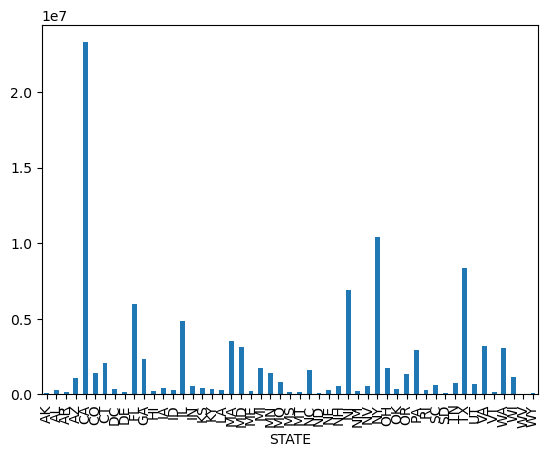

<Figure size 1000x1000 with 0 Axes>

In [49]:
stateEstate.plot.bar()
plt.figure(figsize=(10, 10))
#note that the y axis ticks are scaled I think to 1*10^7

It seems that California, New York, and Texas are the states with the highest total real estate taxes. California in particular has massively high total real estate taxes. We could further investigate this possibly if time permits for our project.

I want to investigate personal property taxes amount and compare that to estate taxes and see how the two metrics are compared to each other.

## Initial Exploration of Personal Property Taxes

In [53]:
#let's go by economic classes first
perspropTaxes = classes['A18800'].sum()
perspropTaxes

agi_stub
1      71801.0
2     407305.0
3     567695.0
4     491267.0
5    1334164.0
6    1286897.0
Name: A18800, dtype: float64

<AxesSubplot: xlabel='agi_stub'>

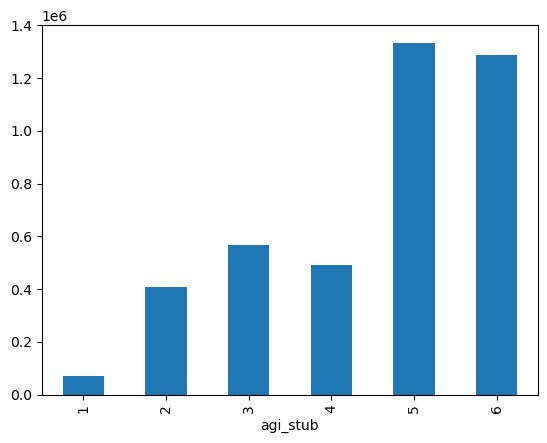

In [54]:
perspropTaxes.plot.bar()

Rich and very rich people pay lots of personal property taxes it seems

In [55]:
#let's get how much % of total taxes paid is personal property taxes for different economic classes
percentagePersPropTaxesClasses = perspropTaxes.div(paidTaxesTotal, axis=0)
percentagePersPropTaxesClasses

agi_stub
1    0.024047
2    0.053374
3    0.041532
4    0.031850
5    0.031004
6    0.030910
dtype: float64

Text(0, 0.5, '% of Taxes Paid That is Personal Property Taxes')

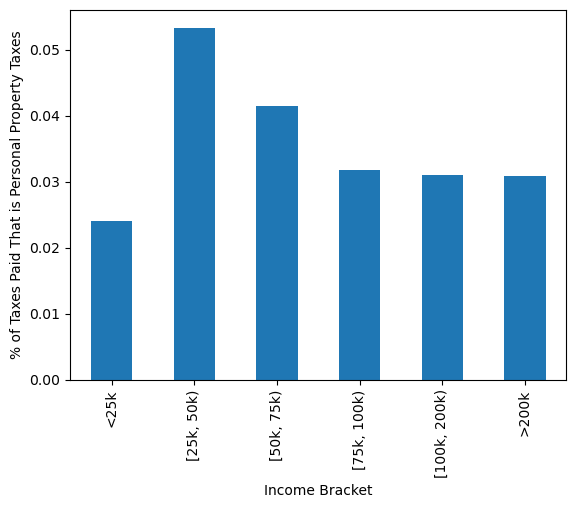

In [59]:
percentagePersPropTaxesClasses = percentagePersPropTaxesClasses.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
percentagePersPropTaxesClasses.plot.bar()
plt.xlabel('Income Bracket')
plt.ylabel('% of Taxes Paid That is Personal Property Taxes')

It seems that overall people who make between $\$$25000 and $\$$ 50000 dollars have the highest % of the total taxes they pay as personal property taxes. However the highest % shown is 0.05 and the percentages don't vary that much across income brackets
in the graph above so overall I would say that personal property taxes don't play a huge role in how much taxes people pay.

In [60]:
#let's look at which states have the highest total personal property taxes
states = df.groupby('STATE')
statePerProp = states['A18800'].sum()
statePerProp

STATE
AK       1495.0
AL      43884.0
AR      26942.0
AZ     140038.0
CA    1269856.0
CO     129104.0
CT     100798.0
DC       5803.0
DE       4174.0
FL     156666.0
GA     141422.0
HI      12111.0
IA      35599.0
ID       6597.0
IL      62134.0
IN      45248.0
KS      43997.0
KY      35159.0
LA      33845.0
MA     116892.0
MD      62808.0
ME      14617.0
MI      82865.0
MN      78280.0
MO     105555.0
MS      39602.0
MT      10274.0
NC     140316.0
ND        879.0
NE      27625.0
NH      23495.0
NJ      60405.0
NM       6235.0
NV      73077.0
NY      61998.0
OH      12726.0
OK      11553.0
OR      15707.0
PA      40610.0
RI      14401.0
SC     109485.0
SD       2658.0
TN      21889.0
TX     234345.0
UT      23557.0
VA     343720.0
VT        517.0
WA     100260.0
WI      11484.0
WV       7274.0
WY       9148.0
Name: A18800, dtype: float64

<AxesSubplot: xlabel='STATE'>

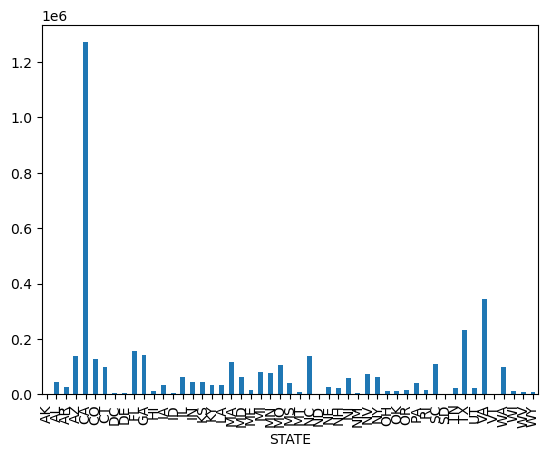

In [61]:
statePerProp.plot.bar()

It seems here that California and Virginia have the highest total personal property taxes paid. I am surprised by the inclusion of Virginia here in the top two. I am curious to why that is. However that isn't a pressing issue here for
our project, so I won't investigate that right now. Instead I will go check out the percentage of total taxes paid as real estate taxes for states (I only did totals before, and this idea just occured to me at the time of typing this)

## Back to Real Estate Taxes

In [63]:
#modifying luke's code here for my own purposes
paidTaxesTotalStates = states['A18300'].agg('sum')
paidTaxesTotalStates

STATE
AK      121802.0
AL      974903.0
AR      510029.0
AZ     2045265.0
CA    25624551.0
CO     2698560.0
CT     2055155.0
DC      597909.0
DE      369939.0
FL     5645871.0
GA     4216005.0
HI      633805.0
IA      687066.0
ID      529398.0
IL     4849197.0
IN     1241130.0
KS      728404.0
KY      832404.0
LA      767640.0
MA     4048656.0
MD     5479722.0
ME      339446.0
MI     2362321.0
MN     2244750.0
MO     1386570.0
MS      481234.0
MT      317020.0
NC     3077504.0
ND       99383.0
NE      460221.0
NH      497716.0
NJ     6004905.0
NM      404808.0
NV      776031.0
NY     9305513.0
OH     2361713.0
OK      753037.0
OR     2178332.0
PA     3771413.0
RI      426689.0
SC     1428321.0
SD      115490.0
TN     1078617.0
TX     7784672.0
UT     1606048.0
VA     5051676.0
VT      161468.0
WA     3391104.0
WI     1582473.0
WV      189409.0
WY       81190.0
Name: A18300, dtype: float64

In [65]:
stateEstatePercentages = stateEstate.div(paidTaxesTotalStates, axis=0)
stateEstatePercentages

STATE
AK    1.019261
AL    0.333604
AR    0.380267
AZ    0.546111
CA    0.908153
CO    0.521142
CT    1.021456
DC    0.613787
DE    0.488313
FL    1.055510
GA    0.549463
HI    0.386076
IA    0.650428
ID    0.509522
IL    1.007657
IN    0.466173
KS    0.624092
KY    0.463446
LA    0.408895
MA    0.876147
MD    0.569850
ME    0.699186
MI    0.728655
MN    0.631841
MO    0.577571
MS    0.391400
MT    0.560498
NC    0.524913
ND    0.761146
NE    0.696085
NH    1.103033
NJ    1.149004
NM    0.503024
NV    0.731989
NY    1.118865
OH    0.745289
OK    0.505666
OR    0.633093
PA    0.782751
RI    0.734490
SC    0.437327
SD    0.819742
TN    0.694053
TX    1.075726
UT    0.423234
VA    0.630412
VT    0.902532
WA    0.900396
WI    0.733381
WV    0.289115
WY    0.992105
dtype: float64

<AxesSubplot: xlabel='STATE'>

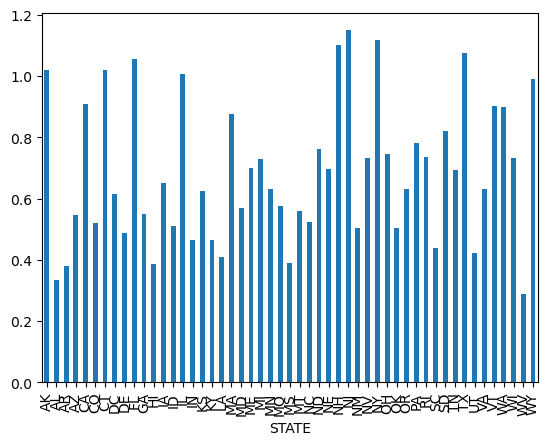

In [67]:
stateEstatePercentages.plot.bar()

Several states have more than 100% of their total taxes paid as real estate taxes. Clearly there must be a lot of real estate property tax credits involved here. I think I need to investigate tax credits in the data set and see if any are related to real
estate. For now presently however I will do what I just did but with personal property taxes.

## Back to Personal Property Taxes

In [68]:
statePerPropPercentages = statePerProp.div(paidTaxesTotalStates, axis=0)
statePerPropPercentages

STATE
AK    0.012274
AL    0.045014
AR    0.052824
AZ    0.068469
CA    0.049556
CO    0.047842
CT    0.049046
DC    0.009705
DE    0.011283
FL    0.027749
GA    0.033544
HI    0.019108
IA    0.051813
ID    0.012461
IL    0.012813
IN    0.036457
KS    0.060402
KY    0.042238
LA    0.044090
MA    0.028872
MD    0.011462
ME    0.043061
MI    0.035078
MN    0.034872
MO    0.076127
MS    0.082293
MT    0.032408
NC    0.045594
ND    0.008845
NE    0.060026
NH    0.047206
NJ    0.010059
NM    0.015402
NV    0.094168
NY    0.006663
OH    0.005388
OK    0.015342
OR    0.007211
PA    0.010768
RI    0.033751
SC    0.076653
SD    0.023015
TN    0.020294
TX    0.030103
UT    0.014668
VA    0.068041
VT    0.003202
WA    0.029566
WI    0.007257
WV    0.038404
WY    0.112674
dtype: float64

<AxesSubplot: xlabel='STATE'>

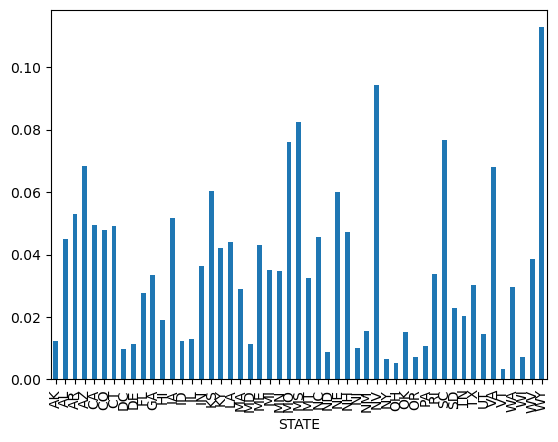

In [70]:
statePerPropPercentages.plot.bar()

Overall it seems that the % of total taxes paid as personal property taxes across states varies somewhat, but doesn't end up comprising a major % of the total taxes paid for any state. The highest % here is 11.27% for Wyoming. I don't know Wyoming has the
highest % here, but that is not an important question for me right now regarding the project. For now I wish to focus on different tax credits in the data set that could end up being related to real esatate. The graph above doesn't provide me much useful information overall.